In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)

In [9]:
df1 = pd.read_csv("E:/ML projects/real estate model/train.csv")
df1.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [3]:
df1.shape

(10884, 30)

In [4]:
df1.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')

In [5]:
df3 = df1.drop([ 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room',
       'floor_number', 'floor_type', 'gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill','mnt_amt', 'bathrooms', 'maintenance_amt',
       'brok_amt', 'deposit_amt','powerbackup',],axis='columns')
df3.shape

(10884, 9)

In [6]:
df3.columns

Index(['bedroom', 'area', 'furnishing', 'avalable_for', 'address', 'facing',
       'parking', 'propertyage', 'rent'],
      dtype='object')

In [7]:
df3.head

<bound method NDFrame.head of        bedroom    area     furnishing                     avalable_for  \
0            2  1050.0    Unfurnished                              All   
1            2   760.0    Unfurnished                              All   
2            3     0.0  Semifurnished                              All   
3            1   628.0      Furnished                      Family Only   
4            2   668.0  Semifurnished    Family , Bachelors (Men Only)   
...        ...     ...            ...                              ...   
10879        2   750.0    Unfurnished                      Family Only   
10880        2     0.0    Unfurnished                              All   
10881        3  2390.0    Unfurnished                      Family Only   
10882        2   563.0  Semifurnished  Family , Bachelors (Women Only)   
10883        1   500.0      Furnished                              All   

                                                 address        facing  \
0      

In [34]:
def clean_address(address):
    parts = address.split(', ')
    if len(parts) > 2:  # Check if there is an apartment name
        return parts[1]  # Return the area name
    else:
        return parts[0]  # Return the area name only

# Apply the clean_address function to the 'address' column
df3['address'] = df3['address'].apply(clean_address)


In [35]:
df3['address'].unique()

array(['Pingale Wasti', 'Wagholi', 'Mahalunge', ..., 'kaspatewasti',
       'Marungi road Laxmi Chowk', 'Opp. To Thopte Lawn'], dtype=object)

In [10]:
df3['address'] = df3['address'].str.replace(', Pune, Maharashtra', '')


In [11]:
df3.to_csv('cleaned_data.csv', index=False)


In [12]:
from IPython.display import FileLink

# Replace 'cleaned_data.csv' with the actual filename you used
FileLink('cleaned_data.csv')


C:\Users\91832\Downloads\cleaned_data.csv

In [13]:
missing_values = df3['address'].isnull()

# To count the number of missing values in the column
count_missing = missing_values.sum()
print(f"Number of missing values in 'column_name': {count_missing}")

Number of missing values in 'column_name': 0


In [14]:
# Remove rows with missing values in the 'column_name'
df3.dropna(subset=['address'], inplace=True)


In [15]:
df3['bedroom'].unique()

array([ 2,  3,  1,  4, 22, 10,  5,  7,  6, 20], dtype=int64)

In [16]:
df3[df3.bedroom>4]

,bedroom,area,furnishing,avalable_for,address,facing,parking,propertyage,rent
1285,22,0.0,Unfurnished,Family Only,"Kharadi,",No Direction,1,0 to 1 Year Old,24768.73599
1811,10,0.0,Unfurnished,All,"Ganesh Park Phase 4, Wagholi,",No Direction,1,1 to 5 Year Old,24768.73599
2037,5,2500.0,Furnished,Family Only,"Virali Bunglow, Sector-25 Pradhikaran,",South-East,1,10+ Year Old,50000.00000
2175,7,0.0,Furnished,All,"Yogdeep , Senapati Bapat Road,",No Direction,3,0 to 1 Year Old,6000.00000
2302,5,0.0,Semifurnished,Family Only,"Chandan Garden, NIBM,",North-East,2,10+ Year Old,70000.00000
2450,5,1800.0,Unfurnished,All,"Blue Ridge, Hinjewadi Phase 1,",North-East,1,1 to 5 Year Old,45000.00000
2747,5,4600.0,Furnished,Family Only,"Aundh anexe,",North-East,4,1 to 5 Year Old,24768.73599
2980,5,0.0,Unfurnished,All,"Kalyani Nagar,",No Direction,1,5 to 10 Year Old,24768.73599
3012,5,0.0,Unfurnished,Family Only,"Lunkad Sky Belvedere, Tingre Nagar,",North-East,3,1 to 5 Year Old,24768.73599
3111,5,4500.0,Unfurnished,Family Only,"Ashok Nagar,",East,2,5 to 10 Year Old,24768.73599


In [17]:
# Assuming 'df3' is your DataFrame and you want to remove rows with 'bedroom' > 5
df3 = df3[df3['bedroom'] <= 5]


In [18]:
df_no_direction = df3[df3['facing'] == 'No Direction']
print(df_no_direction)


       bedroom   area     furnishing                     avalable_for  \
5            2  950.0  Semifurnished                      Family Only   
7            2  900.0    Unfurnished                              All   
13           2    0.0    Unfurnished                              All   
15           1    0.0    Unfurnished                      Family Only   
16           1    0.0    Unfurnished                              All   
...        ...    ...            ...                              ...   
10866        2  700.0  Semifurnished                              All   
10870        2    0.0  Semifurnished                              All   
10871        2    0.0  Semifurnished                              All   
10875        2  700.0      Furnished                              All   
10882        2  563.0  Semifurnished  Family , Bachelors (Women Only)   

                                                 address        facing  \
5                               Vimal Apartment, 

In [19]:
df4 = df3[df3['facing'] != 'No Direction']


In [20]:
df4[df4 == ''].count()

bedroom         0
area            0
furnishing      0
avalable_for    0
address         0
facing          0
parking         0
propertyage     0
rent            0
dtype: int64

In [21]:
# Assuming 'df4' is your DataFrame and you want to remove rows with empty strings in 'address'
df4 = df4[df4['address'] != '']


In [22]:
# Assuming 'df4' is your DataFrame and you want to remove rows where 'area' is zero
df4 = df4[df4['area'] != 0]


In [23]:
len(df3['address'].unique())

6384

In [24]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['rent']/df5['area']
df5.head()


,bedroom,area,furnishing,avalable_for,address,facing,parking,propertyage,rent,price_per_sqft
0,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti,",West,0,5 to 10 Year Old,20000.0,19.047619
1,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi,",East,2,1 to 5 Year Old,14000.0,18.421053
3,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie,",East,1,10+ Year Old,13000.0,20.700637
4,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi,",South,1,1 to 5 Year Old,7500.0,11.227545
6,3,1530.0,Semifurnished,Family Only,"Atul Westernhills, Baner-Sus,",East,2,1 to 5 Year Old,28000.0,18.300654


In [25]:
df5.address = df5.address.apply(lambda x: x.strip())
address_stats = df5['address'].value_counts(ascending=False)
address_stats

Paranjape Blue Ridge, Hinjewadi,                    50
Bramhacorp F Residences, Kalyani Nagar,             27
Xrbia City, Hinjewadi,                              22
Rohan Abhilasha, Wagholi,                           22
Kolte Patil Western Avenue, Wakad,                  21
                                                    ..
Raviraj Heritage, Bopodi,                            1
Anusaya Niwas, Kothrud,                              1
Preet Apartments, Oxy Villa, Wagholi, Oxy Villa,     1
Shreeram Villa, Dhanori,                             1
Mantri Memories, Koregaon Park,                      1
Name: address, Length: 3450, dtype: int64

In [26]:
address_stats.values.sum()

5317

In [27]:
len(address_stats[address_stats>10])

25

In [94]:
len(address_stats)


740

In [99]:
len(address_stats[address_stats<=10])

647

In [101]:
address_stats_less_than_10 = address_stats[address_stats<=10]
address_stats_less_than_10

address
Kalewadi                 10
Thite Nagar              10
Nigdi                    10
Postal Colony            10
Pandhari Nagar           10
                         ..
Hirai sitai mandir        1
Parande Nagar             1
Hulawale Bendre vasti     1
Pandurang Colony          1
247                       1
Name: address, Length: 647, dtype: int64

In [102]:
len(df5.address.unique())

740

In [103]:
df5.address = df5.address.apply(lambda x: 'other' if x in address_stats_less_than_10 else x)
len(df5.address.unique())

94

In [164]:
df5.shape

(5092, 10)

In [117]:
df5[df5.area/df5.bedroom<300].head(20)

,bedroom,area,furnishing,avalable_for,address,facing,parking,propertyage,rent,price_per_sqft
23,2,53.44,Semifurnished,All,Yewalewadi,West,1,1 to 5 Year Old,11000.00,205.84
95,3,780.00,Semifurnished,All,Viman Nagar,East,1,10+ Year Old,16000.00,20.51
154,1,25.12,Unfurnished,All,other,East,0,0 to 1 Year Old,6000.00,238.85
178,4,1000.00,Furnished,All,Balewadi,East,1,0 to 1 Year Old,9999.00,10.00
243,2,44.00,Semifurnished,All,Pisoli,East,2,1 to 5 Year Old,13000.00,295.45
248,3,68.42,Unfurnished,Family Only,Kalyani Nagar,East,1,1 to 5 Year Old,31000.00,453.08
266,1,150.00,Unfurnished,Bachelors (Men/Women),Baner,East,1,1 to 5 Year Old,9000.00,60.00
309,1,150.00,Unfurnished,Bachelors (Men/Women),other,South-East,1,0 to 1 Year Old,8000.00,53.33
335,2,565.00,Semifurnished,All,Wagholi,East,1,1 to 5 Year Old,18000.00,31.86
403,3,790.00,Semifurnished,Family Only,Hinjewadi,East,1,1 to 5 Year Old,20005.00,25.32


In [113]:
df5.shape

(5092, 10)

In [118]:
df6 = df5[~(df5.area/df5.bedroom<200)]
df6.shape

(4992, 10)

In [119]:
df6.price_per_sqft.describe()

count   4992.00
mean      21.64
std        7.08
min        0.18
25%       16.98
50%       20.83
75%       25.45
max       66.67
Name: price_per_sqft, dtype: float64

In [126]:


# Assuming 'df6' is your DataFrame with the 'price_per_sqft' column
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df6['price_per_sqft'].quantile(0.25)
Q3 = df6['price_per_sqft'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep values within the bounds
df7 = df6[(df6['price_per_sqft'] >= lower_bound) & (df6['price_per_sqft'] <= upper_bound)]
df7.shape

(4857, 10)

In [127]:
df7.price_per_sqft.describe()

count   4857.00
mean      21.19
std        6.08
min        4.55
25%       16.92
50%       20.71
75%       25.00
max       38.10
Name: price_per_sqft, dtype: float64

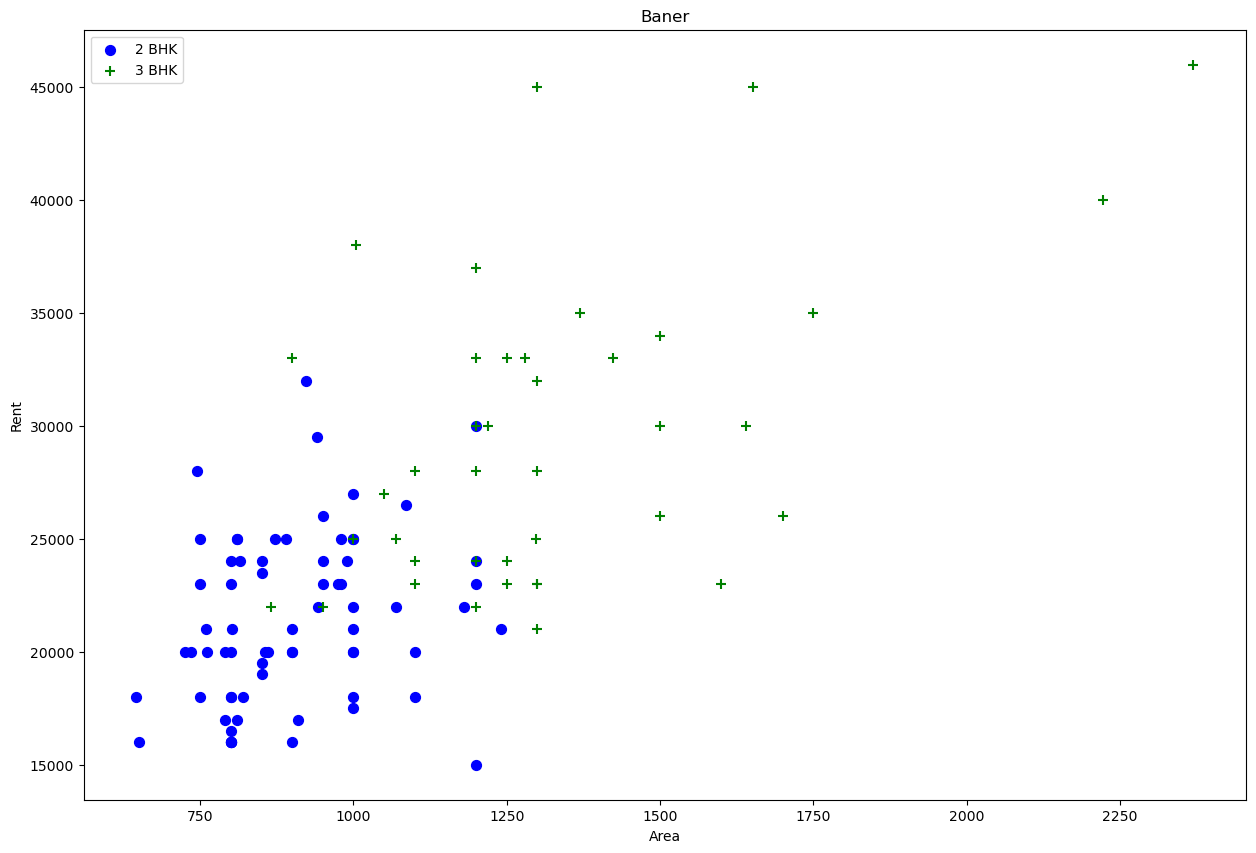

In [143]:
def plot_scatter_chart(df, location, area_col, bedroom_col, address_col, rent_col):
    bhk2 = df[(df[address_col] == location) & (df[bedroom_col] == 2)]
    bhk3 = df[(df[address_col] == location) & (df[bedroom_col] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2[area_col], bhk2[rent_col], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3[area_col], bhk3[rent_col], marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Area")
    plt.ylabel("Rent")
    plt.title(location)
    plt.legend()

# Example usage for your column names
plot_scatter_chart(df7, "Baner", "area", "bedroom", "address", "rent")





Text(0, 0.5, 'Count')

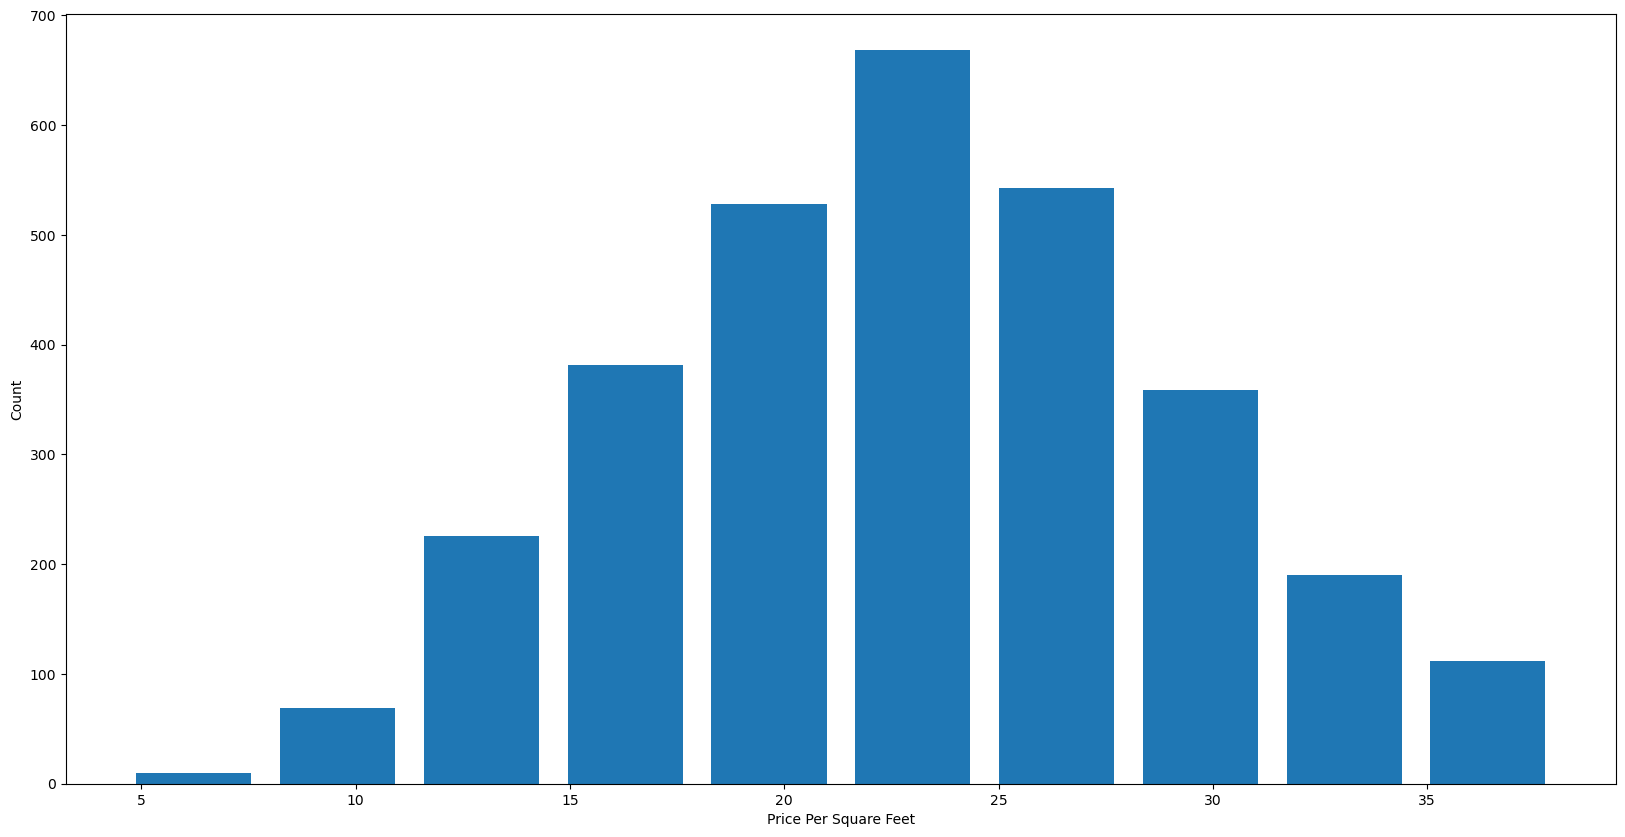

In [146]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [148]:
df7.parking.unique()

array([0, 2, 1, 4, 3, 5], dtype=int64)

Text(0, 0.5, 'Count')

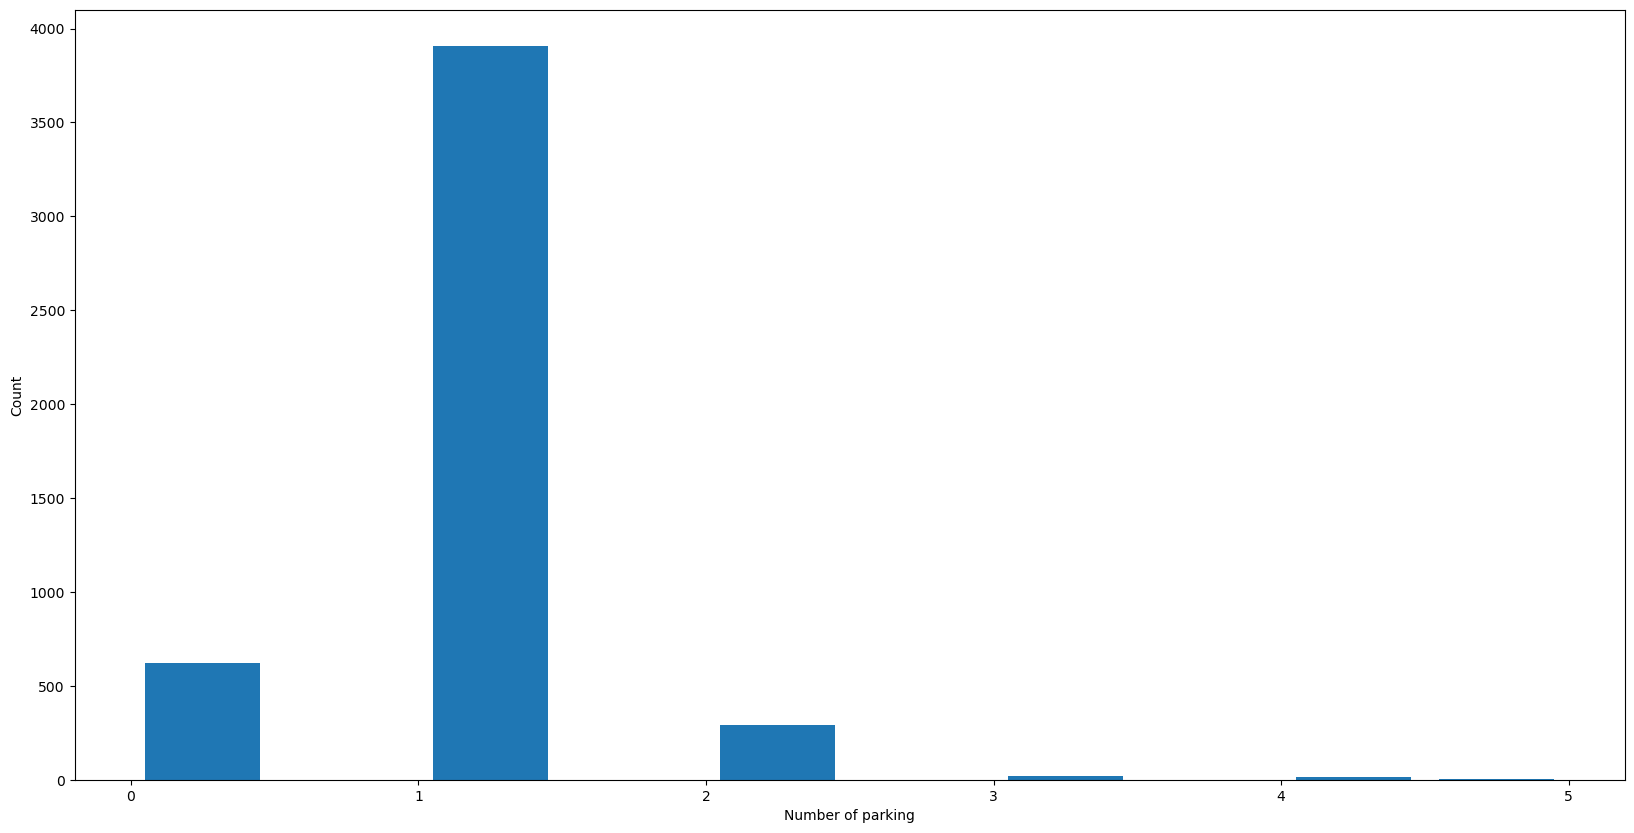

In [149]:
plt.hist(df7.parking,rwidth=0.8)
plt.xlabel("Number of parking")
plt.ylabel("Count")

In [150]:
df7.head(20)

,bedroom,area,furnishing,avalable_for,address,facing,parking,propertyage,rent,price_per_sqft
0,2,1050.00,Unfurnished,All,other,West,0,5 to 10 Year Old,20000.00,19.05
1,2,760.00,Unfurnished,All,Wagholi,East,2,1 to 5 Year Old,14000.00,18.42
3,1,628.00,Furnished,Family Only,Wanowrie,East,1,10+ Year Old,13000.00,20.70
4,2,668.00,Semifurnished,"Family , Bachelors (Men Only)",other,South,1,1 to 5 Year Old,7500.00,11.23
6,3,1530.00,Semifurnished,Family Only,other,East,2,1 to 5 Year Old,28000.00,18.30
9,3,1400.00,Unfurnished,All,Magarpatta,North-West,1,5 to 10 Year Old,25999.00,18.57
11,2,1000.00,Unfurnished,All,Aundh,North-East,1,10+ Year Old,20000.00,20.00
12,3,1500.00,Semifurnished,All,Kharadi,East,1,5 to 10 Year Old,24000.00,16.00
17,1,445.00,Semifurnished,All,Baner,East,1,0 to 1 Year Old,14999.00,33.71
18,2,836.00,Unfurnished,All,other,North-East,0,10+ Year Old,13000.00,15.55


In [266]:
# One-hot encode the specified columns without adding prefixes
furnishing_dummies = pd.get_dummies(df7['furnishing'], prefix=None, drop_first=True)
available_for_dummies = pd.get_dummies(df7['available_for'], prefix=None, drop_first=True)
address_dummies = pd.get_dummies(df7['address'], prefix=None, drop_first=True)
facing_dummies = pd.get_dummies(df7['facing'], prefix=None, drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df8 = pd.concat([df7, furnishing_dummies, available_for_dummies, address_dummies, facing_dummies], axis=1)

# Drop the original categorical columns
df8.drop(['furnishing', 'available_for', 'address', 'facing'], axis=1, inplace=True)

df8.head()


,bedroom,area,parking,propertyage,rent,price_per_sqft,Semifurnished,Unfurnished,Bachelors (Men Only),Bachelors (Men/Women),...,Yerwada,Yewalewadi,other,North,North-East,North-West,South,South-East,South-West,West
0,2,1050.00,0,5 to 10 Year Old,20000.00,19.05,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,760.00,2,1 to 5 Year Old,14000.00,18.42,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,628.00,1,10+ Year Old,13000.00,20.70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,668.00,1,1 to 5 Year Old,7500.00,11.23,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,3,1530.00,2,1 to 5 Year Old,28000.00,18.30,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [267]:
# Rename the 'avalable_for' column to 'available_for' on the original DataFrame
df7 = df7.rename(columns={'avalable_for': 'available_for'})



In [268]:
df7.furnishing.unique()

array(['Unfurnished', 'Furnished', 'Semifurnished'], dtype=object)

In [269]:
# Replace 'Unfurnishe' with 'Unfurnished' in the 'parking' column
df7['furnishing'] = df7['furnishing'].replace('Unfurnishe', 'Unfurnished')


In [270]:
# Label Encoding for 'propertyage' if it has an ordinal relationship
propertyage_mapping = {'0 to 1 Year Old': 0, '1 to 5 Year Old': 1, '5 to 10 Year Old': 2, '10+ Year Old': 3}
df8['propertyage_encoded'] = df8['propertyage'].map(propertyage_mapping)

In [278]:
df9 = df8
df9 = df9.drop(['price_per_sqft'],axis='columns')
df9 = df9.drop(['propertyage'],axis='columns')
df9.head(3)

,bedroom,area,parking,rent,Semifurnished,Unfurnished,Bachelors (Men Only),Bachelors (Men/Women),Bachelors (Women Only),"Family , Bachelors (Men Only)",...,Yewalewadi,other,North,North-East,North-West,South,South-East,South-West,West,propertyage_encoded
0,2,1050.00,0,20000.00,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2.00
1,2,760.00,2,14000.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
3,1,628.00,1,13000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00


In [279]:
df9.dropna(subset=['propertyage_encoded'], inplace=True)


In [280]:
X = df9.drop(['rent'],axis='columns')

X.head(3)

,bedroom,area,parking,Semifurnished,Unfurnished,Bachelors (Men Only),Bachelors (Men/Women),Bachelors (Women Only),"Family , Bachelors (Men Only)","Family , Bachelors (Women Only)",...,Yewalewadi,other,North,North-East,North-West,South,South-East,South-West,West,propertyage_encoded
0,2,1050.00,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2.00
1,2,760.00,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
3,1,628.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00


In [283]:
y = df9.rent
y.head(3)

0   20000.00
1   14000.00
3   13000.00
Name: rent, dtype: float64

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [296]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7136642971323424

In [239]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 7.06222128e-01, -2.01846966e+14, -4.62089085e+16, -1.26487966e+16,
        7.08594917e-01])

In [240]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create a Ridge regression model with a regularization strength (alpha)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed

# Fit the model to your training data
ridge_model.fit(X_train, y_train)

# Evaluate the model on the test data
ridge_score = ridge_model.score(X_test, y_test)

# Print the model's score (R-squared)
print("Ridge Regression R-squared:", ridge_score)


Ridge Regression R-squared: 0.7138371397235942


In [241]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with a regularization strength (alpha)
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value as needed

# Fit the model to your training data
lasso_model.fit(X_train, y_train)

# Evaluate the model on the test data
lasso_score = lasso_model.score(X_test, y_test)

# Print the model's score (R-squared)
print("Lasso Regression R-squared:", lasso_score)


Lasso Regression R-squared: 0.7132201412225063


In [264]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

E:\ADITYA\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
E:\ADITYA\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeli

,model,best_score,best_params
0,linear_regression,-11811910420160324.00,{'normalize': False}
1,lasso,0.71,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.54,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [242]:
df9.head()

,bedroom,area,parking,rent,furnishing_Semifurnished,furnishing_Unfurnished,available_for_Bachelors (Men Only),available_for_Bachelors (Men/Women),available_for_Bachelors (Women Only),"available_for_Family , Bachelors (Men Only)",...,address_Yewalewadi,address_other,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_South-West,facing_West,propertyage_encoded
0,2,1050.00,0,20000.00,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2.00
1,2,760.00,2,14000.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
3,1,628.00,1,13000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00
4,2,668.00,1,7500.00,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1.00
6,3,1530.00,2,28000.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.00


In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric features in your training data
X_train[['area', 'parking',  'propertyage_encoded']] = scaler.fit_transform(X_train[['area', 'parking',  'propertyage_encoded']])

# Transform the same columns in your test data using the fitted scaler
X_test[['area', 'parking',  'propertyage_encoded']] = scaler.transform(X_test[['area', 'parking',  'propertyage_encoded']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 3330.5115754996173


In [252]:
X.columns


Index(['bedroom', 'area', 'parking', 'furnishing_Semifurnished',
       'furnishing_Unfurnished', 'available_for_Bachelors (Men Only)',
       'available_for_Bachelors (Men/Women)',
       'available_for_Bachelors (Women Only)',
       'available_for_Family , Bachelors (Men Only)',
       'available_for_Family , Bachelors (Women Only)',
       ...
       'address_Yewalewadi', 'address_other', 'facing_North',
       'facing_North-East', 'facing_North-West', 'facing_South',
       'facing_South-East', 'facing_South-West', 'facing_West',
       'propertyage_encoded'],
      dtype='object', length=113)

In [246]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Random Forest Regression', RandomForestRegressor(random_state=0)),
    ('SVR', SVR(kernel='linear')),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=0)),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5)),
]

# Iterate through the models and evaluate them
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate R-squared score
    score = model.score(X_test, y_test)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{name}:")
    print(f"R-squared: {score}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print("-" * 50)


Linear Regression:
R-squared: 0.7258810443325152
MAE: 3330.5115754996173
RMSE: 5219.471080981765
--------------------------------------------------
Lasso Regression:
R-squared: 0.7255937072869116
MAE: 3319.0155147034334
RMSE: 5222.205942176999
--------------------------------------------------
Random Forest Regression:
R-squared: 0.7275715082713954
MAE: 3339.3325006980053
RMSE: 5203.352215960757
--------------------------------------------------
SVR:
R-squared: 0.6039919913643168
MAE: 4146.933118783733
RMSE: 6273.486183423803
--------------------------------------------------
Gradient Boosting Regression:
R-squared: 0.7250203551075454
MAE: 3328.7817565788937
RMSE: 5227.658806865763
--------------------------------------------------
K-Nearest Neighbors Regression:
R-squared: 0.6390355626825882
MAE: 3976.6383749225943
RMSE: 5989.480699244837
--------------------------------------------------


In [250]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score
import numpy as np

# Create a list of regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR(kernel='linear')),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor())
]

# Create a function to evaluate and print model performance
def evaluate_model(model, X, y):
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = cross_val_score(model, X, y, cv=cv)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    return mean_score, std_score

# Evaluate and print the performance of each model
for name, model in models:
    mean_score, std_score = evaluate_model(model, X, y)
    print(f"{name}:")
    print(f"Mean R-squared: {mean_score}")
    print(f"Standard Deviation of R-squared: {std_score}")
    print("-" * 50)


Linear Regression:
Mean R-squared: -1.1811910420160324e+16
Standard Deviation of R-squared: 1.787562521470739e+16
--------------------------------------------------
Lasso Regression:
Mean R-squared: 0.7123677709005869
Standard Deviation of R-squared: 0.019504999736597743
--------------------------------------------------
Ridge Regression:
Mean R-squared: 0.7129440197047138
Standard Deviation of R-squared: 0.019218939061583305
--------------------------------------------------
Decision Tree Regression:
Mean R-squared: 0.5050668989670324
Standard Deviation of R-squared: 0.03548192512380443
--------------------------------------------------
Random Forest Regression:
Mean R-squared: 0.7122162685104
Standard Deviation of R-squared: 0.017713385197679773
--------------------------------------------------
Gradient Boosting Regression:
Mean R-squared: 0.7169357377199285
Standard Deviation of R-squared: 0.020746834255440945
--------------------------------------------------
Support Vector Regres

In [297]:
def predict_rent(address, bedroom, area, parking, furnishing, available_for, facing, propertyage_encoded):
    # Initialize the input array with zeros
    x = np.zeros(len(X.columns))
    
    # Set the values for the known features
    x[0] = bedroom
    x[1] = area
    x[2] = parking
    
    # Set the value for 'propertyage_encoded'
    x[-1] = propertyage_encoded
    
    # Find the index corresponding to the 'address' category in the columns
    address_index = np.where(X.columns == address)[0]
    
    # Find the index corresponding to the 'furnishing' category in the columns
    furnishing_index = np.where(X.columns == furnishing)[0]
    
    # Find the index corresponding to the 'available_for' category in the columns
    available_for_index = np.where(X.columns == available_for)[0]
    
    # Find the index corresponding to the 'facing' category in the columns
    facing_index = np.where(X.columns == facing)[0]
    
    # If the categories exist in the columns, set their values to 1
    if len(address_index) > 0:
        x[address_index] = 1
    
    if len(furnishing_index) > 0:
        x[furnishing_index] = 1
    
    if len(available_for_index) > 0:
        x[available_for_index] = 1
    
    if len(facing_index) > 0:
        x[facing_index] = 1
    
    # Use the trained Random Forest model to make the prediction
    predicted_rent = rf_model.predict([x])[0]
    
    return predicted_rent


# Example usage:
predicted_rent = predict_rent('Baner', 2, 1050.00, 0, 'Semifurnished', 'Bachelors (Men Only)','North', 2.00)
print("Predicted Rent:", predicted_rent)


Predicted Rent: 19116.533333333333


E:\ADITYA\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [299]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor with desired hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your training data (X_train and y_train)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data (X_test and y_test)
rf_score = rf_model.score(X_test, y_test)

# Print the model's score (R-squared)
print("Random Forest R-squared:", rf_score)


TypeError: fit() got an unexpected keyword argument 'feature_name'

In [287]:
X.head(20)

,bedroom,area,parking,Semifurnished,Unfurnished,Bachelors (Men Only),Bachelors (Men/Women),Bachelors (Women Only),"Family , Bachelors (Men Only)","Family , Bachelors (Women Only)",...,Yewalewadi,other,North,North-East,North-West,South,South-East,South-West,West,propertyage_encoded
0,2,1050.00,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2.00
1,2,760.00,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
3,1,628.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00
4,2,668.00,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1.00
6,3,1530.00,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.00
9,3,1400.00,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.00
11,2,1000.00,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.00
12,3,1500.00,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.00
17,1,445.00,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
18,2,836.00,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,3.00


In [298]:
# Example usage:
predicted_rent = predict_rent('Hinjewadi', 2, 1050.00, 0, 'Furnished', 'Bachelors (Women Only)','North', 2.00)
print("Predicted Rent:", predicted_rent)

Predicted Rent: 20985.0


E:\ADITYA\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [300]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(rf_model,f)

In [301]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Create the full path to the saved model file
model_file_path = os.path.join(current_directory, 'banglore_home_prices_model.pickle')

# Check if the model file exists
if os.path.exists(model_file_path):
    print(f"Model file saved at: {model_file_path}")
else:
    print("Model file not found.")


Model file saved at: C:\Users\91832\banglore_home_prices_model.pickle


In [302]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [303]:


# Get the current working directory
current_directory = os.getcwd()

# Create the full path to the saved model file
model_file_path = os.path.join(current_directory, 'columns.json')

# Check if the model file exists
if os.path.exists(model_file_path):
    print(f"Model file saved at: {model_file_path}")
else:
    print("Model file not found.")

Model file saved at: C:\Users\91832\columns.json
